# 목표
- 손 글씨 숫자(0~9)를 분류하는 모델을 만들어 보자

# 데이터 수집

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("digit_train.csv")

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [6]:
img0 = data.iloc[0, 1:]

In [7]:
print(img0.max())
print(img0.min())

255
0


# EDA

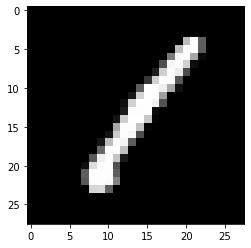

In [20]:
plt.imshow(img0.values.reshape(28,28), cmap = 'gray') #cmap -> 지정색깔로 보겠다
plt.show()

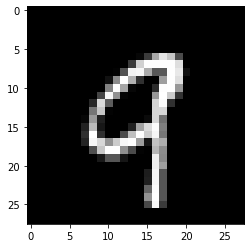

In [45]:
#iloc[a,b] -> a-> 행의 값은 변경 가능 / b -> 열의 갯수만큼 표시해야함
# 여기선 1: 혹은 :784로 할 수 있는데 0의 데이터가 정답이므로 :784로 할 경우 정답을 포함하기 떄문에
# 1:로 하는 게 옳음
img1 = data.iloc[41999, 1:] 
plt.imshow(img1.values.reshape(28,28), cmap = 'gray')
plt.show()

# 모델 선택 및 하이퍼 파라미터 조정

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [33]:
logi = LogisticRegression()
svm = LinearSVC()

## 데이터셋 분리

In [40]:
X = data.iloc[:5000, 1:]
y = data.iloc[:5000, 0]
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [46]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 7
)

## 교차검증

In [65]:
from sklearn.model_selection import cross_val_score
import warnings

In [66]:
# 경고창 무시
warnings.filterwarnings('ignore')

In [67]:
logi_result = cross_val_score(logi, X_train, y_train, cv = 5)
svm_result = cross_val_score(svm, X_train, y_train, cv = 5)

In [68]:
print('logi : ', logi_result.mean())
print('svm : ', svm_result.mean())

logi :  0.8760000000000001
svm :  0.8217142857142857


# 학습

In [69]:
logi.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC()

# 평가

In [70]:
print('logi : ', logi.score(X_test,y_test))
print('svm : ', svm.score(X_test,y_test))

logi :  0.8746666666666667
svm :  0.816


In [79]:
logi.predict_proba(X_test[50:60])

array([[2.50934860e-057, 4.19357429e-058, 7.76849735e-053,
        2.45267814e-056, 1.09561631e-020, 3.38947236e-062,
        1.25562087e-043, 3.33596602e-019, 4.89653756e-026,
        1.00000000e+000],
       [7.06277803e-102, 4.02176650e-064, 8.75489327e-060,
        2.20859902e-065, 1.00000000e+000, 1.15314809e-053,
        4.90166374e-055, 1.55723972e-041, 2.26088691e-043,
        3.41178359e-031],
       [1.40436603e-058, 1.51253825e-027, 2.37624840e-032,
        4.07324071e-040, 1.26118476e-034, 1.00000000e+000,
        1.49842738e-053, 1.99276557e-054, 1.72062984e-015,
        1.15254885e-049],
       [1.29967085e-094, 4.10315691e-021, 3.40828774e-006,
        8.26252116e-027, 7.84840689e-016, 5.70602655e-034,
        3.39273253e-037, 9.99996592e-001, 1.88115179e-021,
        1.38649050e-014],
       [1.00000000e+000, 4.38466911e-056, 3.53286189e-039,
        1.66547616e-047, 1.54054700e-066, 1.50448689e-030,
        2.34424123e-031, 1.75607259e-079, 1.12449258e-026,
        1.8

In [84]:
logi.predict(X_test[50:60])

array([9, 4, 5, 7, 0, 6, 9, 7, 9, 4], dtype=int64)

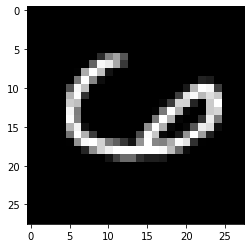

In [94]:
img9 = X_test.iloc[55] 
plt.imshow(img9.values.reshape(28,28), cmap = 'gray')
plt.show()

# 분류평가지표

In [95]:
from sklearn.metrics import classification_report

In [98]:
logi_pre = logi.predict(X_test)
print(classification_report(logi_pre, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       152
           1       0.96      0.92      0.94       172
           2       0.89      0.88      0.88       164
           3       0.87      0.81      0.84       149
           4       0.90      0.91      0.90       137
           5       0.76      0.83      0.80       131
           6       0.91      0.93      0.92       162
           7       0.86      0.88      0.87       150
           8       0.77      0.80      0.78       134
           9       0.85      0.82      0.84       149

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.88      0.87      0.88      1500



In [99]:
cvm_pre = logi.predict(X_test)
print(classification_report(cvm_pre, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       152
           1       0.96      0.92      0.94       172
           2       0.89      0.88      0.88       164
           3       0.87      0.81      0.84       149
           4       0.90      0.91      0.90       137
           5       0.76      0.83      0.80       131
           6       0.91      0.93      0.92       162
           7       0.86      0.88      0.87       150
           8       0.77      0.80      0.78       134
           9       0.85      0.82      0.84       149

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.88      0.87      0.88      1500

